In [1]:
from vivarium import InteractiveContext, Artifact

from datetime import datetime, timedelta
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd, numpy as np
#pd.set_option('display.max_rows', 60)

import numpy as np
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.backends.backend_pdf import PdfPages

### LDL-Validation
- Need to confirm branch prior to working 
- Run on 8/25/22, pulled today 
- Working on validation and verification of LDL-C 

## Load in Data and First Time Step

In [2]:
path = Path('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')
path

PosixPath('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')

In [3]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({
                          'population':
                              {'population_size': 10_000,
                              },
                          'time':
                              {'start':
                                  {'year': 2021
                                  }
                              }
                          }
                        )
sim.setup()


2022-11-29 11:59:26.382 | DEBUG    | vivarium.framework.values:register_value_modifier:392 - Registering metrics.1.population_manager.metrics as modifier to metrics
2022-11-29 11:59:26.386 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf.
2022-11-29 11:59:26.386 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact base filter terms are ['draw == 0'].
2022-11-29 11:59:26.387 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:68 - Artifact additional filter terms are None.
2022-11-29 11:59:26.686 | DEBUG    | vivarium.framework.values:_register_value_producer:338 - Registering value pipeline cause_specific_mortality_rate
2022-11-29 11:59:26.687 | DEBUG    | vivarium.framework.values:_register_value_producer:338 - Registering value pipeline mortality_rate
2022-11-29 11:59:27.106 | DEBUG    | vivarium.framework.values:_regis

In [4]:
pop0 = sim.get_population()
pop0.head()

,tracked,sex,location,alive,exit_time,age,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,ldlc_medication_adherence,outreach,sbp_medication,sbp_multiplier,ldlc_medication,polypill,ldlc_multiplier,sbp_medication_adherence,visit_type,scheduled_date
0,True,Female,Alabama,alive,NaT,47.388882,2020-12-04,0.0,not_dead,0.0,...,cat3,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT
1,True,Male,Alabama,alive,NaT,41.564194,2020-12-04,0.0,not_dead,0.0,...,cat3,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT
2,True,Female,Alabama,alive,NaT,53.155826,2020-12-04,0.0,not_dead,0.0,...,cat3,cat2,one_drug_half_dose_efficacy,1.0,medium_intensity,cat2,1.362,cat1,none,NaT
3,True,Male,Alabama,alive,NaT,30.457692,2020-12-04,0.0,not_dead,0.0,...,cat1,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT
4,True,Female,Alabama,alive,NaT,19.554806,2020-12-04,0.0,not_dead,0.0,...,cat1,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT


In [5]:
pop0.columns

Index(['tracked', 'sex', 'location', 'alive', 'exit_time', 'age',
       'entrance_time', 'years_of_life_lost', 'cause_of_death',
       'years_lived_with_disability', 'previous_ischemic_stroke',
       'previous_myocardial_infarction', 'sbp_medication_adherence_propensity',
       'ldlc_medication_adherence_propensity', 'outreach_propensity',
       'polypill_propensity', 'ischemic_stroke', 'myocardial_infarction',
       'high_ldl_cholesterol_propensity',
       'ensemble_propensity_risk_factor.high_ldl_cholesterol',
       'high_systolic_blood_pressure_propensity',
       'ensemble_propensity_risk_factor.high_systolic_blood_pressure',
       'high_body_mass_index_in_adults_propensity',
       'ensemble_propensity_risk_factor.high_body_mass_index_in_adults',
       'susceptible_to_ischemic_stroke_event_time',
       'susceptible_to_ischemic_stroke_event_count',
       'acute_ischemic_stroke_event_time', 'acute_ischemic_stroke_event_count',
       'chronic_ischemic_stroke_event_count'

In [6]:
sim.list_values()

['metrics',
 'cause_specific_mortality_rate',
 'mortality_rate',
 'affected_unmodeled.cause_specific_mortality_rate',
 'affected_unmodeled.cause_specific_mortality_rate.paf',
 'disability_weight',
 'sbp_medication_adherence.propensity',
 'sbp_medication_adherence.exposure',
 'risk_factor.sbp_medication_adherence.exposure_parameters',
 'ldlc_medication_adherence.propensity',
 'ldlc_medication_adherence.exposure',
 'risk_factor.ldlc_medication_adherence.exposure_parameters',
 'outreach.propensity',
 'outreach.exposure',
 'risk_factor.outreach.exposure_parameters',
 'risk_factor.outreach.exposure_parameters.paf',
 'polypill.propensity',
 'polypill.exposure',
 'risk_factor.polypill.exposure_parameters',
 'risk_factor.polypill.exposure_parameters.paf',
 'high_ldl_cholesterol.exposure',
 'acute_myocardial_infarction.incidence_rate',
 'acute_myocardial_infarction.incidence_rate.paf',
 'post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate',
 'post_myocardial_infarction_to_

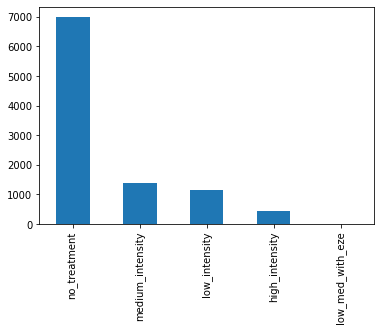

In [7]:
ax = pop0['ldlc_medication'].value_counts().plot(kind='bar')

In [8]:
data1 = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl_cholesterol')], axis=1)
data1.head()

,tracked,sex,location,alive,exit_time,age,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,outreach,sbp_medication,sbp_multiplier,ldlc_medication,polypill,ldlc_multiplier,sbp_medication_adherence,visit_type,scheduled_date,high_ldl_cholesterol
0,True,Female,Alabama,alive,NaT,47.388882,2020-12-04,0.0,not_dead,0.0,...,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,2.672922
1,True,Male,Alabama,alive,NaT,41.564194,2020-12-04,0.0,not_dead,0.0,...,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,3.377397
2,True,Female,Alabama,alive,NaT,53.155826,2020-12-04,0.0,not_dead,0.0,...,cat2,one_drug_half_dose_efficacy,1.0,medium_intensity,cat2,1.362,cat1,none,NaT,1.864838
3,True,Male,Alabama,alive,NaT,30.457692,2020-12-04,0.0,not_dead,0.0,...,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,4.959918
4,True,Female,Alabama,alive,NaT,19.554806,2020-12-04,0.0,not_dead,0.0,...,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,0.000000


In [9]:
data1 = data1.loc[data1.age > 25]

In [10]:
bins = [25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,125]
labels = ['25_to_29','30_to_34','35_to_39','40_to_44','45_to_49','50_to_54','55_to_59','60_to_64','65_to_69','70_to_74','75_to_79','80_to_84','85_to_89','90_to_94','95_to_124']
data1['age_group'] = pd.cut(data1.age, bins, labels = labels,include_lowest = True)

data1.head()

,tracked,sex,location,alive,exit_time,age,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,sbp_medication,sbp_multiplier,ldlc_medication,polypill,ldlc_multiplier,sbp_medication_adherence,visit_type,scheduled_date,high_ldl_cholesterol,age_group
0,True,Female,Alabama,alive,NaT,47.388882,2020-12-04,0.0,not_dead,0.0,...,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,2.672922,45_to_49
1,True,Male,Alabama,alive,NaT,41.564194,2020-12-04,0.0,not_dead,0.0,...,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,3.377397,40_to_44
2,True,Female,Alabama,alive,NaT,53.155826,2020-12-04,0.0,not_dead,0.0,...,one_drug_half_dose_efficacy,1.0,medium_intensity,cat2,1.362,cat1,none,NaT,1.864838,50_to_54
3,True,Male,Alabama,alive,NaT,30.457692,2020-12-04,0.0,not_dead,0.0,...,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,4.959918,30_to_34
6,True,Male,Alabama,alive,NaT,33.645113,2020-12-04,0.0,not_dead,0.0,...,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,1.974520,30_to_34


In [11]:
ldl_summ = (data1
                 .groupby(['age_group', 'sex'])
                 .high_ldl_cholesterol.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
ldl_summ.head()

,age_group,sex,mean,2.5%,97.5%
0,25_to_29,Female,2.898224,1.532372,4.485033
1,25_to_29,Male,2.761452,1.544693,4.317741
2,30_to_34,Female,2.839780,1.366937,4.361751
3,30_to_34,Male,2.797582,1.455610,4.452512
4,35_to_39,Female,2.710897,1.334452,4.261164


In [12]:
art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])
art_pop = art.load('population.structure').reset_index()

In [13]:
def load_artifact_data(word:str, cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load(word + '.' + cause + '.' + measure)
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

In [14]:
ldl_exp = load_artifact_data('risk_factor', 'high_ldl_cholesterol', 'exposure')
ldl_exp['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(ldl_exp.age_start,ldl_exp.age_end)]
ldl_exp.head()

/tmp/ipykernel_2776881/881126595.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_art_data = master_art_data.append(data)


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,continuous,2.805110,2.597516,3.051877,Alabama,exposure,25_to_29
1,female,30.0,35.0,2019,2020,continuous,2.790157,2.588387,2.991761,Alabama,exposure,30_to_34
2,female,35.0,40.0,2019,2020,continuous,2.855153,2.640309,3.069596,Alabama,exposure,35_to_39
3,female,40.0,45.0,2019,2020,continuous,2.864634,2.652549,3.073091,Alabama,exposure,40_to_44
4,female,45.0,50.0,2019,2020,continuous,2.994765,2.785903,3.219201,Alabama,exposure,45_to_49


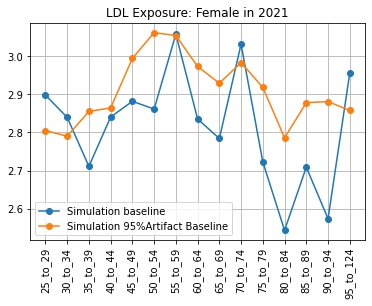

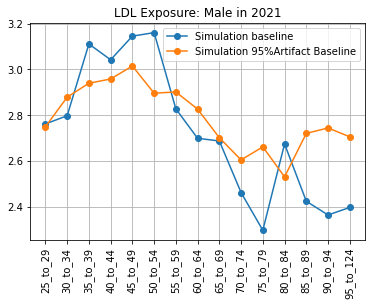

In [15]:
for sex in ldl_summ.sex.unique():
    plt.figure() 
    subdata = ldl_summ.loc[(ldl_summ.sex==sex)]
    plt.plot(subdata['age_group'], subdata['mean'], marker='o')
    #plt.fill_between(subdata['age_group'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = ldl_exp.loc[(ldl_exp.sex==str.lower(sex))]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'LDL Exposure: {sex} in 2021') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(['Simulation baseline', 'Simulation 95%' 'Artifact Baseline', 'Artifact 95%']) 

In [79]:
sim_data = pd.DataFrame()
for step in list(range(0,12)):
    sim.step()
    pop_t = sim.get_population()
    data_t = pd.concat([pop_t,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop_t.index).rename('high_ldl_cholesterol'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop_t.index).rename('high_sbp')], axis=1)

    data_t['step'] = step
    sim_data = pd.concat([sim_data, data_t])

2022-12-01 06:33:53.994 | DEBUG    | vivarium.framework.engine:step:172 - 2021-12-03 00:00:00
2022-12-01 06:34:11.699 | DEBUG    | vivarium.framework.engine:step:172 - 2021-12-31 00:00:00
2022-12-01 06:34:29.337 | DEBUG    | vivarium.framework.engine:step:172 - 2022-01-28 00:00:00
2022-12-01 06:34:47.031 | DEBUG    | vivarium.framework.engine:step:172 - 2022-02-25 00:00:00
2022-12-01 06:35:04.927 | DEBUG    | vivarium.framework.engine:step:172 - 2022-03-25 00:00:00
2022-12-01 06:35:22.405 | DEBUG    | vivarium.framework.engine:step:172 - 2022-04-22 00:00:00
2022-12-01 06:35:40.115 | DEBUG    | vivarium.framework.engine:step:172 - 2022-05-20 00:00:00
2022-12-01 06:35:57.795 | DEBUG    | vivarium.framework.engine:step:172 - 2022-06-17 00:00:00
2022-12-01 06:36:15.556 | DEBUG    | vivarium.framework.engine:step:172 - 2022-07-15 00:00:00
2022-12-01 06:36:33.342 | DEBUG    | vivarium.framework.engine:step:172 - 2022-08-12 00:00:00
2022-12-01 06:36:50.667 | DEBUG    | vivarium.framework.engi

In [17]:
pd.set_option('display.max_columns', 500)
sim_data.head()

,tracked,sex,location,alive,exit_time,age,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,previous_ischemic_stroke,previous_myocardial_infarction,sbp_medication_adherence_propensity,ldlc_medication_adherence_propensity,outreach_propensity,polypill_propensity,ischemic_stroke,myocardial_infarction,high_ldl_cholesterol_propensity,ensemble_propensity_risk_factor.high_ldl_cholesterol,high_systolic_blood_pressure_propensity,ensemble_propensity_risk_factor.high_systolic_blood_pressure,high_body_mass_index_in_adults_propensity,ensemble_propensity_risk_factor.high_body_mass_index_in_adults,susceptible_to_ischemic_stroke_event_time,susceptible_to_ischemic_stroke_event_count,acute_ischemic_stroke_event_time,acute_ischemic_stroke_event_count,chronic_ischemic_stroke_event_count,chronic_ischemic_stroke_event_time,susceptible_to_myocardial_infarction_event_time,susceptible_to_myocardial_infarction_event_count,acute_myocardial_infarction_event_time,acute_myocardial_infarction_event_count,post_myocardial_infarction_event_count,post_myocardial_infarction_event_time,ldlc_medication_adherence,outreach,sbp_medication,sbp_multiplier,ldlc_medication,polypill,ldlc_multiplier,sbp_medication_adherence,visit_type,scheduled_date,high_ldl_cholesterol,step
0,True,Female,Alabama,alive,NaT,47.465542,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.334382,0.956760,0.567907,0.179690,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.362468,0.932830,0.650952,0.805138,0.208828,0.404214,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,2.672922,0
1,True,Male,Alabama,alive,NaT,41.640854,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.761295,0.544647,0.763932,0.768978,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.695510,0.514493,0.625507,0.980707,0.358604,0.477233,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,3.377397,0
2,True,Female,Alabama,alive,NaT,53.232486,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.157850,0.655547,0.187922,0.867645,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.155857,0.025920,0.165289,0.617849,0.531571,0.930716,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,one_drug_half_dose_efficacy,1.0,medium_intensity,cat2,1.362,cat1,none,NaT,1.864838,0
3,True,Male,Alabama,alive,NaT,30.534352,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.929373,0.011717,0.836101,0.901193,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.821628,0.175181,0.162353,0.981899,0.388049,0.446869,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat1,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,4.959918,0
4,True,Female,Alabama,alive,NaT,19.631466,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.515017,0.118663,0.665731,0.470896,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.658736,0.717085,0.479221,0.461457,0.672873,0.674971,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat1,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,0.000000,0


In [18]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#'low_intensity','medium_intensity'
sim_data.loc[(sim_data.ldlc_medication.isin(['low_intensity'])) & (sim_data.ldlc_medication_adherence == 'cat3') & (sim_data.step == 0)]

,tracked,sex,location,alive,exit_time,age,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,previous_ischemic_stroke,previous_myocardial_infarction,sbp_medication_adherence_propensity,ldlc_medication_adherence_propensity,outreach_propensity,polypill_propensity,ischemic_stroke,myocardial_infarction,high_ldl_cholesterol_propensity,ensemble_propensity_risk_factor.high_ldl_cholesterol,high_systolic_blood_pressure_propensity,ensemble_propensity_risk_factor.high_systolic_blood_pressure,high_body_mass_index_in_adults_propensity,ensemble_propensity_risk_factor.high_body_mass_index_in_adults,susceptible_to_ischemic_stroke_event_time,susceptible_to_ischemic_stroke_event_count,acute_ischemic_stroke_event_time,acute_ischemic_stroke_event_count,chronic_ischemic_stroke_event_count,chronic_ischemic_stroke_event_time,susceptible_to_myocardial_infarction_event_time,susceptible_to_myocardial_infarction_event_count,acute_myocardial_infarction_event_time,acute_myocardial_infarction_event_count,post_myocardial_infarction_event_count,post_myocardial_infarction_event_time,ldlc_medication_adherence,outreach,sbp_medication,sbp_multiplier,ldlc_medication,polypill,ldlc_multiplier,sbp_medication_adherence,visit_type,scheduled_date,high_ldl_cholesterol,step
209,True,Female,Alabama,alive,NaT,45.650502,2020-12-04,0.0,not_dead,0.000000,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.050756,0.591511,0.114457,0.097335,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.444958,0.546865,0.114915,0.121928,0.880832,0.364345,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,one_drug_half_dose_efficacy,1.000,low_intensity,cat2,1.2467,cat1,none,NaT,2.583417,0
232,True,Male,Alabama,alive,NaT,26.158193,2020-12-04,0.0,not_dead,0.000000,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.391099,0.443938,0.068206,0.435867,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.538963,0.336589,0.995146,0.182016,0.765128,0.251113,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,two_drug_half_dose_efficacy,1.120,low_intensity,cat2,1.2467,cat3,none,NaT,2.568543,0
246,True,Male,Alabama,alive,NaT,71.494266,2020-12-04,0.0,not_dead,0.000000,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.189099,0.905082,0.135327,0.200469,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.401291,0.415963,0.557001,0.680055,0.112805,0.227222,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,one_drug_half_dose_efficacy,1.000,low_intensity,cat2,1.0000,cat2,background,2021-05-24 04:19:05.250000000,1.600346,0
291,True,Male,Alabama,alive,NaT,32.580401,2020-12-04,0.0,not_dead,0.000000,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.926833,0.796440,0.162873,0.097881,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.219613,0.770850,0.337681,0.798128,0.209477,0.167153,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,one_drug_half_dose_efficacy,1.051,low_intensity,cat2,1.2467,cat3,none,NaT,2.214470,0
719,True,Female,Alabama,alive,NaT,42.441663,2020-12-04,0.0,not_dead,0.000000,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.616132,0.550974,0.251947,0.368778,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.152197,0.629028,0.410618,0.863941,0.632393,0.050343,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,one_drug_half_dose_efficacy,1.051,low_intensity,cat2,1.2467,cat3,none,NaT,2.022204,0
783,True,Male,Alabama,alive,NaT,38.123395,2020-12-04,0.0,not_dead,0.000000,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.613261,0.486541,0.525339,0.318032,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.422344,0.428075,0.977977,0.687476,0.745970,0.375484,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,two_drug_half_dose_efficacy,1.120,low_intensity,cat2,1.2467,cat3,none,NaT,2.805299,0
801,True,Female,Alabama,alive,NaT,60.795618,2020-12-04,0.0,not_dead,0.000000,susceptible_to_ische

In [80]:
sim_data = sim_data.loc[(sim_data.age > 25) & (sim_data.alive == 'alive')]

In [81]:
bins = [25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,125]
labels = ['25_to_29','30_to_34','35_to_39','40_to_44','45_to_49','50_to_54','55_to_59','60_to_64','65_to_69','70_to_74','75_to_79','80_to_84','85_to_89','90_to_94','95_to_124']
sim_data['age_group'] = pd.cut(sim_data.age, bins, labels = labels,include_lowest = True)

sim_data.head()

,tracked,sex,location,alive,exit_time,age,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,previous_ischemic_stroke,previous_myocardial_infarction,sbp_medication_adherence_propensity,ldlc_medication_adherence_propensity,outreach_propensity,polypill_propensity,ischemic_stroke,myocardial_infarction,high_ldl_cholesterol_propensity,ensemble_propensity_risk_factor.high_ldl_cholesterol,high_systolic_blood_pressure_propensity,ensemble_propensity_risk_factor.high_systolic_blood_pressure,high_body_mass_index_in_adults_propensity,ensemble_propensity_risk_factor.high_body_mass_index_in_adults,susceptible_to_ischemic_stroke_event_time,susceptible_to_ischemic_stroke_event_count,acute_ischemic_stroke_event_time,acute_ischemic_stroke_event_count,chronic_ischemic_stroke_event_count,chronic_ischemic_stroke_event_time,susceptible_to_myocardial_infarction_event_time,susceptible_to_myocardial_infarction_event_count,acute_myocardial_infarction_event_time,acute_myocardial_infarction_event_count,post_myocardial_infarction_event_count,post_myocardial_infarction_event_time,ldlc_medication_adherence,outreach,sbp_medication,sbp_multiplier,ldlc_medication,polypill,ldlc_multiplier,sbp_medication_adherence,visit_type,scheduled_date,high_ldl_cholesterol,high_sbp,step,age_group
0,True,Female,Alabama,alive,NaT,48.385460,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.334382,0.956760,0.567907,0.179690,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.362468,0.932830,0.650952,0.805138,0.208828,0.404214,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,2.672922,126.711324,0,45_to_49
1,True,Male,Alabama,alive,NaT,42.560772,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.761295,0.544647,0.763932,0.768978,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.695510,0.514493,0.625507,0.980707,0.358604,0.477233,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,2022-04-21 14:57:15.463814400,3.377397,135.497307,0,40_to_44
2,True,Female,Alabama,alive,NaT,54.152404,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.157850,0.655547,0.187922,0.867645,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.155857,0.025920,0.165289,0.617849,0.531571,0.930716,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,one_drug_half_dose_efficacy,1.0,low_med_with_eze,cat2,1.362,cat1,none,2022-01-31 21:56:54.472099200,1.506525,112.215005,0,50_to_54
3,True,Male,Alabama,alive,NaT,31.454270,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.929373,0.011717,0.836101,0.901193,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.821628,0.175181,0.162353,0.981899,0.388049,0.446869,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat1,cat2,no_treatment,1.0,no_treatment,cat2,1.000,cat3,none,NaT,4.959918,114.705760,0,30_to_34
6,True,Male,Alabama,alive,NaT,34.641691,2020-12-04,0.0,not_dead,0.0,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.347509,0.487440,0.384689,0.037994,susceptible_to_ischemic_stroke,susceptible_to_myocardial_infarction,0.089818,0.456672,0.829307,0.049536,0.199137,0.417418,NaT,0,NaT,0,0,NaT,NaT,0,NaT,0,0,NaT,cat3,cat2,one_drug_half_dose_efficacy,1.0,no_treatment,cat2,1.000,cat3,none,2022-03-26 21:48:16.122729600,1.974520,126.071367,0,30_to_34


In [21]:
ldl_summ = (sim_data
                 .groupby(['age_group', 'sex','step'])
                 .high_ldl_cholesterol.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
ldl_summ.head()

,age_group,sex,step,mean,2.5%,97.5%
0,25_to_29,Female,0,2.885284,1.536568,4.478274
1,25_to_29,Female,1,2.872920,1.494665,4.480977
2,25_to_29,Female,2,2.867321,1.490765,4.472866
3,25_to_29,Female,3,2.860063,1.477415,4.466107
4,25_to_29,Female,4,2.851738,1.477023,4.468811


In [82]:
sbp_summ = (sim_data
                 .groupby(['age_group', 'sex','step'])
                 .high_sbp.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
sbp_summ.head()

,age_group,sex,step,mean,2.5%,97.5%
0,25_to_29,Female,0,111.086258,97.419917,129.493092
1,25_to_29,Female,1,111.011450,97.455729,129.487787
2,25_to_29,Female,2,110.993122,97.545709,128.845404
3,25_to_29,Female,3,110.988332,97.554356,128.772231
4,25_to_29,Female,4,110.928196,97.541386,128.881990


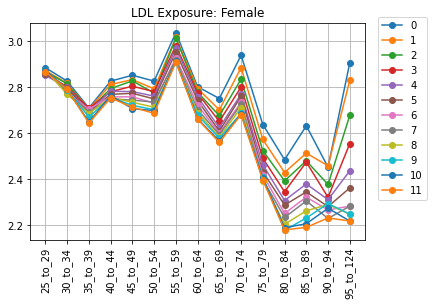

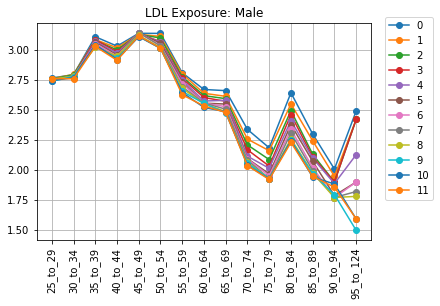

In [22]:
for sex in ldl_summ.sex.unique():
    plt.figure() 
    subdata = ldl_summ.loc[(ldl_summ.sex==sex)]
    groups = subdata.groupby('step')
    for name, group in groups: 
        plt.plot(group['age_group'], group['mean'], marker='o', label=name)
        #plt.fill_between(group['age_group'], group['2.5%'], group['97.5%'], alpha=.3)
    #subdata2 = ldl_exp.loc[(ldl_exp.sex==str.lower(sex))]
    #plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'LDL Exposure: {sex}') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.2, 1.05))

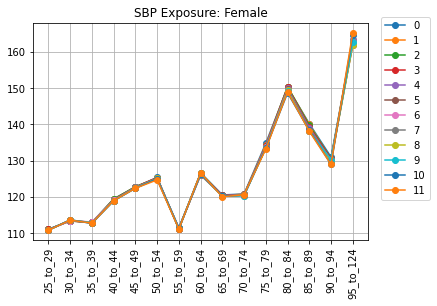

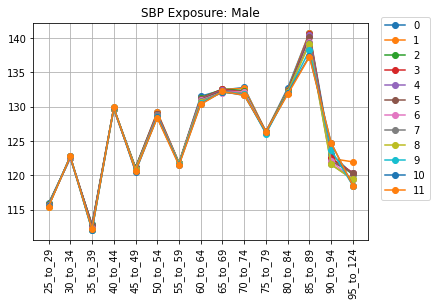

In [84]:
for sex in sbp_summ.sex.unique():
    plt.figure() 
    subdata = sbp_summ.loc[(sbp_summ.sex==sex)]
    groups = subdata.groupby('step')
    for name, group in groups: 
        plt.plot(group['age_group'], group['mean'], marker='o', label=name)
        #plt.fill_between(group['age_group'], group['2.5%'], group['97.5%'], alpha=.3)
    #subdata2 = ldl_exp.loc[(ldl_exp.sex==str.lower(sex))]
    #plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'SBP Exposure: {sex}') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.2, 1.05))

In [45]:
sim_data_small = sim_data[['age_group','sex','step','ldlc_medication','alive']]
sim_data_small_summ = (sim_data_small
                 .groupby(['age_group','sex','step','ldlc_medication'])
                 .count()
                 .reset_index())
sim_data_small_summ.head()

,age_group,sex,step,ldlc_medication,alive
0,25_to_29,Female,0,high_intensity,7
1,25_to_29,Female,0,high_with_eze,0
2,25_to_29,Female,0,low_intensity,9
3,25_to_29,Female,0,low_med_with_eze,5
4,25_to_29,Female,0,medium_intensity,19


<BarContainer object of 2160 artists>

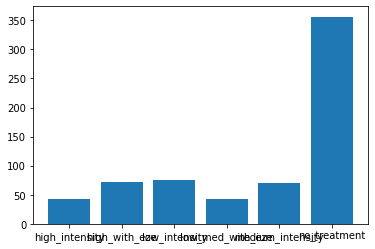

In [46]:
plt.bar(sim_data_small_summ.ldlc_medication, sim_data_small_summ.alive) 

In [41]:
time_0 = sim_data.loc[(sim_data.step == 0)]
time_0 = time_0[['age_group','sex','ldlc_medication','alive']]
time_11 = sim_data.loc[(sim_data.step == 11)]
time_11 = time_11[['age_group','sex','ldlc_medication','alive']]
time_11.head()

,age_group,sex,ldlc_medication,alive
0,45_to_49,Female,no_treatment,alive
1,40_to_44,Male,no_treatment,alive
2,50_to_54,Female,low_med_with_eze,alive
3,30_to_34,Male,no_treatment,alive
6,30_to_34,Male,no_treatment,alive


In [60]:
#'age_group', 'sex',
time_11_summ = (time_11
                 .groupby(['ldlc_medication'])
                 .count()
                 .reset_index())
time_11_summ

,ldlc_medication,age_group,sex,alive
0,high_intensity,438,438,438
1,high_with_eze,860,860,860
2,low_intensity,1051,1051,1051
3,low_med_with_eze,377,377,377
4,medium_intensity,354,354,354
5,no_treatment,4442,4442,4442


In [61]:
time_0_summ = (time_0
                 .groupby(['ldlc_medication'])
                 .count()
                 .reset_index())
time_0_summ

,ldlc_medication,age_group,sex,alive
0,high_intensity,392,392,392
1,high_with_eze,67,67,67
2,low_intensity,1108,1108,1108
3,low_med_with_eze,285,285,285
4,medium_intensity,1109,1109,1109
5,no_treatment,4492,4492,4492


In [71]:
1- (4492/(4492+1109+285+1108+67+392))

0.39728968200724546

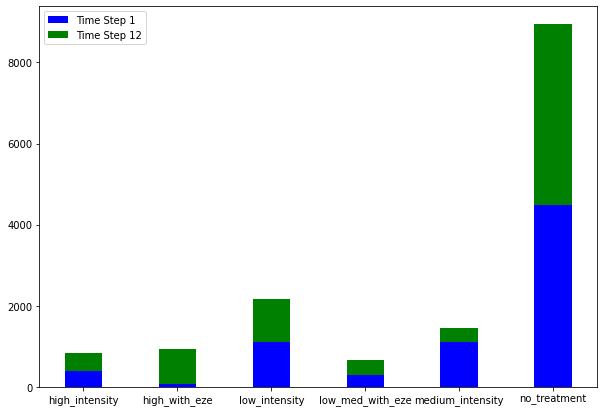

In [65]:
fig = plt.subplots(figsize =(10, 7))

width = 0.4

br1 = np.arange(6)
br2 = [x + barWidth for x in br1]

plt.bar(time_0_summ.ldlc_medication, time_0_summ.alive, width, color = 'b') 
plt.bar(time_11_summ.ldlc_medication, time_11_summ.alive,  width, bottom = time_0_summ.alive, color = 'g')
plt.legend(('Time Step 1', 'Time Step 12'))

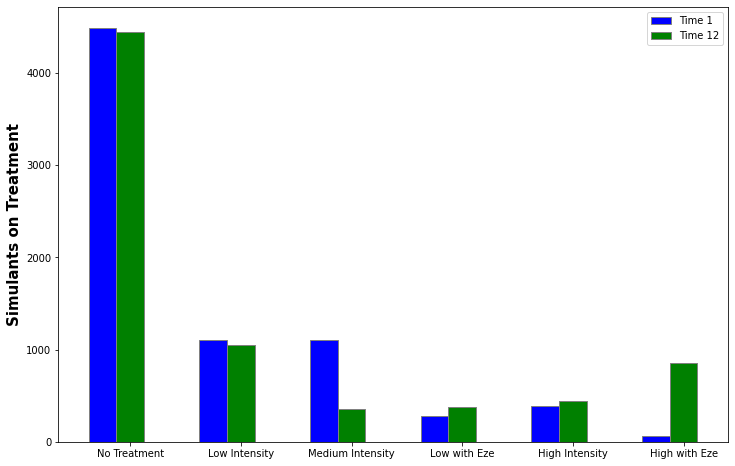

In [68]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Time_0 = [4492, 1108, 1109, 285, 392, 67]
Time_11 = [4442, 1051, 354, 377, 438, 860]
 
# Set position of bar on X axis
br1 = np.arange(len(Time_0))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, Time_0, color ='b', width = barWidth,
        edgecolor ='grey', label ='Time 1')
plt.bar(br2, Time_11, color ='g', width = barWidth,
        edgecolor ='grey', label ='Time 12')

# Adding Xticks
plt.ylabel('Simulants on Treatment', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Time_0))],
        ['No Treatment', 'Low Intensity', 'Medium Intensity', 'Low with Eze', 'High Intensity', 'High with Eze'])
 
plt.legend()
plt.show()

In [76]:
time_0_sbp = sim_data.loc[(sim_data.step == 0)]
time_0_sbp = time_0_sbp[['sbp_medication','alive']]
time_11_sbp = sim_data.loc[(sim_data.step == 11)]
time_11_sbp = time_11_sbp[['sbp_medication','alive']]

time_0_sbp_summ = (time_0_sbp
                 .groupby(['sbp_medication'])
                 .count()
                 .reset_index())

time_11_sbp_summ = (time_11_sbp
                 .groupby(['sbp_medication'])
                 .count()
                 .reset_index())
print(time_0_sbp_summ)
print(time_11_sbp_summ)

                sbp_medication  alive
0                 no_treatment   3737
1  one_drug_half_dose_efficacy   2455
2   one_drug_std_dose_efficacy     62
3  two_drug_half_dose_efficacy   1126
4   two_drug_std_dose_efficacy     73
                  sbp_medication  alive
0                   no_treatment   3241
1    one_drug_half_dose_efficacy   2634
2     one_drug_std_dose_efficacy    171
3  three_drug_half_dose_efficacy    130
4   three_drug_std_dose_efficacy    101
5    two_drug_half_dose_efficacy   1053
6     two_drug_std_dose_efficacy    192


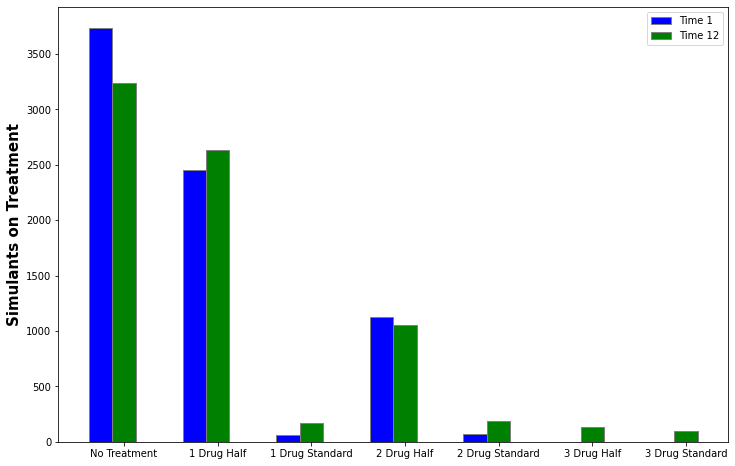

In [78]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Time_0 = [3737, 2455, 62, 1126, 73, 0, 0]
Time_11 = [3241, 2634, 171, 1053, 192, 130, 101]
 
# Set position of bar on X axis
br1 = np.arange(len(Time_0))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, Time_0, color ='b', width = barWidth,
        edgecolor ='grey', label ='Time 1')
plt.bar(br2, Time_11, color ='g', width = barWidth,
        edgecolor ='grey', label ='Time 12')

# Adding Xticks
plt.ylabel('Simulants on Treatment', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Time_0))],
        ['No Treatment', '1 Drug Half', '1 Drug Standard', '2 Drug Half', '2 Drug Standard', '3 Drug Half', '3 Drug Standard'])
 
plt.legend()
plt.show()

In [85]:
3737 / (3737+2455+62+1126+73)

0.5014088286596001